In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  # change this to your working directory



# TPR / FPR

/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


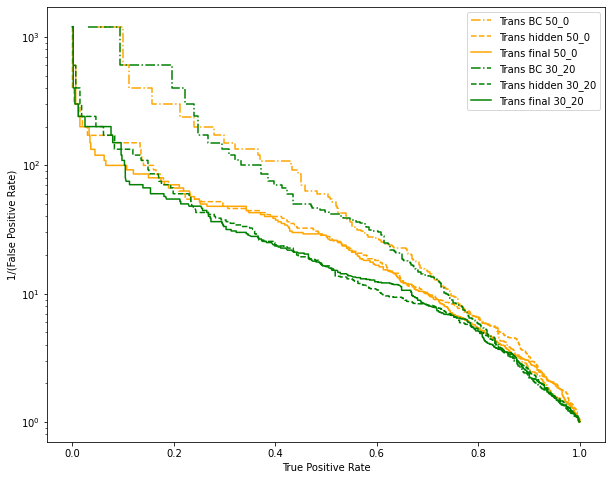

In [21]:
# Load in the data

exp_id_list = ["col_split_10_40", "col_split_8_42", "col_split_6_44", "col_split_4_46", "col_split_2_48"]
#exp_id_list = ["col_split_20_30", "col_split_20_0", "col_split_30_0", "col_split_30_20"]
exp_id_list = ["col_split_50_0", "col_split_49_1"]
exp_id_list = ["col_split_50_0", "col_split_49_1", "col_split_50_0_seed2", "col_split_49_1_seed2", 
               "col_split_50_0_seed3","col_split_49_1_seed3", "col_split_50_0_seed4","col_split_49_1_seed4"]
#exp_id_list = ["0016d","0032d","0052d","0100d","0200d","0300d","0400d","0600d","0800d","1000d"]
#exp_id_list = ["0016d","0032d","0100d","0200d","0400d"]

exp_id_list = ["50_0", "30_20"]

lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}

for exp_id in exp_id_list:
    expt_dir = base_dir + "projects/rep_learning/experiments/dijet/" + exp_id + "/"
    constit_num = exp_id.split("_")[0]
    #constit_num = 50
    
    lct_const_rep_tpr_dict[exp_id] = np.load( expt_dir+"const_rep_lct_tpr_"+str(constit_num)+".npy" )
    lct_const_rep_fpr_dict[exp_id] = np.load( expt_dir+"const_rep_lct_fpr_"+str(constit_num)+".npy" )
    nn_const_rep_tpr_dict[exp_id] = np.load( expt_dir+"const_rep_nn_tpr_"+str(constit_num)+".npy" )
    nn_const_rep_fpr_dict[exp_id] = np.load( expt_dir+"const_rep_nn_fpr_"+str(constit_num)+".npy" )
    trans_BC_tpr_dict[exp_id] = np.load( expt_dir+"trans_BC_tpr_"+str(constit_num)+".npy" )
    trans_BC_fpr_dict[exp_id] = np.load( expt_dir+"trans_BC_fpr_"+str(constit_num)+".npy" )
    lct_tpr_dict[0][exp_id] = np.load( expt_dir+"CLR_LCT0_tpr_"+str(constit_num)+".npy" )
    lct_fpr_dict[0][exp_id] = np.load( expt_dir+"CLR_LCT0_fpr_"+str(constit_num)+".npy" )
    lct_tpr_dict[1][exp_id] = np.load( expt_dir+"CLR_LCT1_tpr_"+str(constit_num)+".npy" )
    lct_fpr_dict[1][exp_id] = np.load( expt_dir+"CLR_LCT1_fpr_"+str(constit_num)+".npy" )
    lct_tpr_dict[2][exp_id] = np.load( expt_dir+"CLR_LCT2_tpr_"+str(constit_num)+".npy" )
    lct_fpr_dict[2][exp_id] = np.load( expt_dir+"CLR_LCT2_fpr_"+str(constit_num)+".npy" )


#colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10","C11"]

colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"][2:]

#colors = ["red", "blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

plt.figure(figsize = (10,8))

for i, exp_id in enumerate(exp_id_list):

    #plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[i], linestyle = "dotted")
    #plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[i])
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[i], linestyle = "dashdot")
    #plt.plot(lct_tpr_dict[0][exp_id], 1.0/lct_fpr_dict[0][exp_id], label = "LCT0 "+exp_id, color = colors[i])
    plt.plot(lct_tpr_dict[1][exp_id], 1.0/lct_fpr_dict[1][exp_id], label = "Trans hidden "+exp_id, color = colors[i], linestyle = "dashed")
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "Trans final "+exp_id, color = colors[i], linestyle = "solid")
    
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()



# Losses

In [ ]:
# load in data
losses_clr_train_num_jets = {}
losses_clr_numer_train_num_jets = {}
losses_clr_denom_train_num_jets = {}
losses_clr_val_train_num_jets = {}
lct_auc_num_jets = {}
nn_auc_num_jets = {}


grading = 20
start = grading
n_constits_max = grading


expt_dir = base_dir + "projects/rep_learning/experiments/more_transformations/"

for constit_num in range(start,n_constits_max+grading,grading):

    losses_clr_train_num_jets[constit_num] = np.load( expt_dir+"clr_losses_train_"+str(constit_num)+".npy")
    losses_clr_numer_train_num_jets[constit_num] = np.load( expt_dir+"clr_numer_loss_train_"+str(constit_num)+".npy")
    losses_clr_denom_train_num_jets[constit_num] = np.load( expt_dir+"clr_denom_loss_train_"+str(constit_num)+".npy")
    losses_clr_val_train_num_jets[constit_num] = np.load( expt_dir+"clr_losses_val_"+str(constit_num)+".npy")
    lct_auc_num_jets[constit_num] = np.load( expt_dir+"lct_auc_"+str(constit_num)+".npy")
    nn_auc_num_jets[constit_num] = np.load( expt_dir+"nn_auc_"+str(constit_num)+".npy")

    
def plot_losses(list_of_plots, title, ylog = False):
    """
    list_of_plots = [(plot_x, plot_y, label)]
    """
    plt.figure()
    for to_plot in list_of_plots:
       
        plt.plot(to_plot[0], to_plot[1], label=to_plot[2])
    plt.legend()
    if ylog:
        plt.yscale("log")
    plt.xlabel("Epochs")
    plt.title(title)
    plt.show()
    
    
"""
Plot the training contrastive losses
"""
plot_clr_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_clr_losses.append((range(len(losses_clr_train_num_jets[constit_num])),
                           losses_clr_train_num_jets[constit_num], "CLR loss, "+str(constit_num) + " constits"))
    plot_clr_losses.append((losses_clr_val_train_num_jets[constit_num][0],
                           losses_clr_val_train_num_jets[constit_num][1],"Val loss, "+str(constit_num) + " constits"))
plot_losses(plot_clr_losses, "Contrastive losses, training", True)  
    
"""
Plot the validation contrastive losses
"""
#plot_clr_val_losses = []
#for constit_num in range(start,n_constits_max+grading,grading):
#    plot_clr_val_losses.append((losses_clr_val_train_num_jets[constit_num][0],
#                           losses_clr_val_train_num_jets[constit_num][1],str(constit_num) + " constits"))
#plot_losses(plot_clr_val_losses, "Contrastive losses, validation", True)  


"""
Plot the LC + NN AUC
"""

plot_LCT_stats = []

for constit_num in range(start,n_constits_max+grading,grading):
    plot_LCT_stats.append((lct_auc_num_jets[constit_num][0], lct_auc_num_jets[constit_num][1],
                             "LC transformer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((lct_auc_num_jets[constit_num][0], lct_auc_num_jets[constit_num][2],
                            "LC hidden layer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((lct_auc_num_jets[constit_num][0], lct_auc_num_jets[constit_num][3],
                            "LC output layer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((nn_auc_num_jets[constit_num][0], nn_auc_num_jets[constit_num][1],
                             "NN, "+ str(constit_num) + " constits"))
    
plot_losses(plot_LCT_stats, "ROC Area", False)  


    
    
"""
Plot the training contrastive losses num + denom
"""

plot_num_val_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_num_val_losses.append((range(len(losses_clr_numer_train_num_jets[constit_num])),
                           -losses_clr_numer_train_num_jets[constit_num], str(constit_num) + " constits"))
plot_losses(plot_num_val_losses, "-Alignment losses (should increase)", True)  

plot_den_val_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_den_val_losses.append((range(len(losses_clr_denom_train_num_jets[constit_num])),
                           losses_clr_denom_train_num_jets[constit_num],  str(constit_num) + " constits"))
plot_losses(plot_den_val_losses, "Uniformity losses (should decrease)", True)  


    